# Emails spam classifier

## Preprocessing and EDA

### Importing libraries 

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import VotingClassifier
import nltk
import warnings
import string
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")  # Change to the desired style
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import regex
from wordcloud import WordCloud
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from sklearn.metrics import ConfusionMatrixDisplay
from nltk.stem import PorterStemmer 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
# Download the required NLTK data
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_curve, roc_auc_score, precision_recall_curve, auc

In [75]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [77]:
df.head(4)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN


In [78]:
enc = LabelEncoder()
df['target'] = enc.fit_transform(df['v1'])
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,target
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,0
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,1
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,0
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN,1
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN,0
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN,0
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN,0


In [79]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
target           0
dtype: int64

* Some of the rows are useless we should remove them.

In [80]:
df.drop(['Unnamed: 2'	,'Unnamed: 3'	,'Unnamed: 4' , 'v1' ] , axis=1 , inplace=True)

### Check for the duplicated and remove them.

In [81]:
df

,v2,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will Ì_ b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


In [82]:
df.duplicated().sum()

np.int64(403)

* There are duplicates in the data.

In [83]:
df = df.drop_duplicates()

In [84]:
df.duplicated().sum()

np.int64(0)

* No duplicates now.

In [85]:
data = df.copy()
data.rename( {'v2':'text'} , axis=1 , inplace=True)

In [86]:
data

,text,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will Ì_ b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


## Exploratory Data Analysis

#### Imbalance in the dataset.

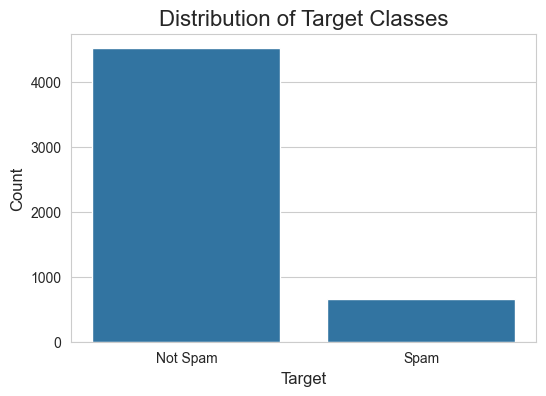

In [87]:
# Set the figure size
plt.figure(figsize=(6, 4))

# Plot the count plot
ax = sns.countplot(data=data, x='target')

# Customize the aesthetics
ax.set_title('Distribution of Target Classes', fontsize=16)  # Add title
ax.set_xlabel('Target', fontsize=12)  # Add label for x-axis
ax.set_ylabel('Count', fontsize=12)  # Add label for y-axis

# Customize the tick labels
ax.set_xticklabels(['Not Spam', 'Spam'], fontsize=10)  # Set x-axis tick labels
ax.plot()
plt.show()

**There is some imbalance in the dataset.**

### Number of words in the data mail.

In [88]:
import re

def simple_tokenize(text):
    return re.findall(r'\b\w+\b', text)

data['word counts'] = data['text'].apply(lambda x: len(simple_tokenize(x)))


In [89]:
data['word counts'].describe()

count    5169.000000
mean       15.989940
std        11.518372
min         0.000000
25%         8.000000
50%        12.000000
75%        23.000000
max       190.000000
Name: word counts, dtype: float64

In [90]:
data[data['target'] == 1]['word counts'].describe()

count    653.000000
mean      25.595712
std        6.185684
min        2.000000
25%       24.000000
50%       27.000000
75%       29.000000
max       40.000000
Name: word counts, dtype: float64

In [91]:
data[data['target'] == 0]['word counts'].describe()

count    4516.000000
mean       14.600974
std        11.448193
min         0.000000
25%         7.000000
50%        11.000000
75%        19.000000
max       190.000000
Name: word counts, dtype: float64

Text(0, 0.5, 'Counts')

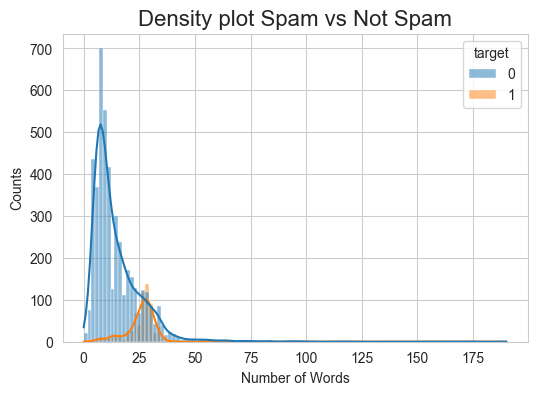

In [92]:
plt.figure(figsize=(6, 4))
ax = sns.histplot(data=data, x="word counts", hue="target" , kde=True)
ax.set_title('Density plot Spam vs Not Spam' , fontsize=16)
ax.set_xlabel('Number of Words')
ax.set_ylabel('Counts')

* Spam mails has more words in general and less variation.
* Not spam mails has less number of words.

### Number of Charcters in the mail

In [93]:
data['text_len_chars'] = data['text'].apply(lambda x : len(x))

In [94]:
data['text_len_chars'].describe()

count    5169.000000
mean       78.977945
std        58.236293
min         2.000000
25%        36.000000
50%        60.000000
75%       117.000000
max       910.000000
Name: text_len_chars, dtype: float64

In [95]:
data[data['target'] == 0]['text_len_chars'].describe()

count    4516.000000
mean       70.459256
std        56.358207
min         2.000000
25%        34.000000
50%        52.000000
75%        90.000000
max       910.000000
Name: text_len_chars, dtype: float64

In [96]:
data[data['target'] == 1]['text_len_chars'].describe()

count    653.000000
mean     137.891271
std       30.137753
min       13.000000
25%      132.000000
50%      149.000000
75%      157.000000
max      224.000000
Name: text_len_chars, dtype: float64

Text(0, 0.5, 'Counts')

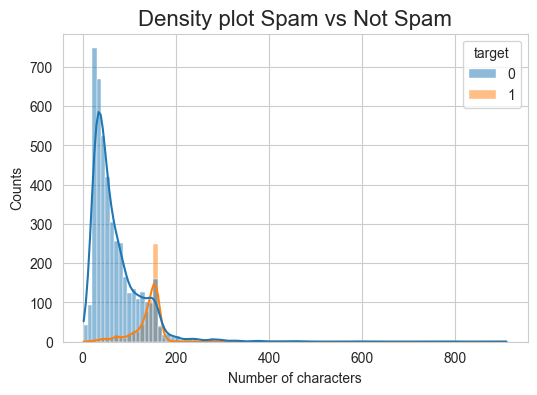

In [97]:
plt.figure(figsize=(6, 4))
ax = sns.histplot(data=data, x="text_len_chars", hue="target" , kde=True)
ax.set_title('Density plot Spam vs Not Spam' , fontsize=16)
ax.set_xlabel('Number of characters')
ax.set_ylabel('Counts')

* Spam mails has more Characters in general and less variation.
* Not spam mails has less number of Charcters.

### Number of Sentence in the mail.

In [98]:
import spacy

# Load the English model in spacy
nlp = spacy.load('en_core_web_sm')

def count_sentences_spacy(text):
    doc = nlp(text)
    return len(list(doc.sents))
data['num_sentences'] = data['text'].apply(count_sentences_spacy)

In [99]:
data['num_sentences'].describe()

count    5169.000000
mean        2.100987
std         1.456628
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        27.000000
Name: num_sentences, dtype: float64

In [100]:
data[data['target'] == 0]['num_sentences'].describe()

count    4516.000000
mean        1.961913
std         1.400953
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max        27.000000
Name: num_sentences, dtype: float64

In [101]:
data[data['target'] == 1]['num_sentences'].describe()

count    653.000000
mean       3.062787
std        1.471835
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        9.000000
Name: num_sentences, dtype: float64

Text(0, 0.5, 'Counts')

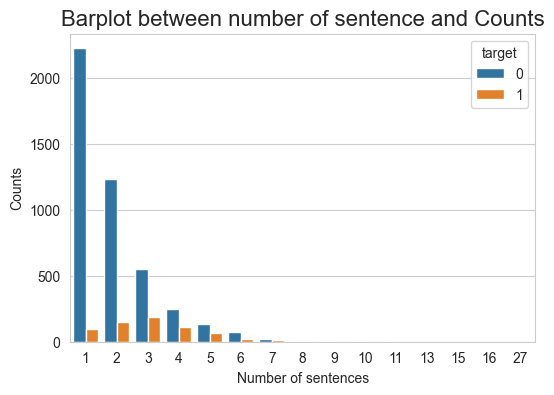

In [102]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=data, x="num_sentences", hue="target" )
ax.set_title('Barplot between number of sentence and Counts' , fontsize=16)
ax.set_xlabel('Number of sentences')
ax.set_ylabel('Counts')

* Not spam mails have less number of sentence.
* Spam mails have more number of sentence.

In [103]:
data

,text,target,word counts,text_len_chars,num_sentences
0,"Go until jurong point, crazy.. Available only ...",0,20,111,3
1,Ok lar... Joking wif u oni...,0,6,29,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,33,155,2
3,U dun say so early hor... U c already then say...,0,11,49,2
4,"Nah I don't think he goes to usf, he lives aro...",0,14,61,1
...,...,...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1,33,161,4
5568,Will Ì_ b going to esplanade fr home?,0,8,37,1
5569,"Pity, * was in mood for that. So...any other s...",0,10,57,2
5570,The guy did some bitching but I acted like i'd...,0,27,125,3


<Axes: >

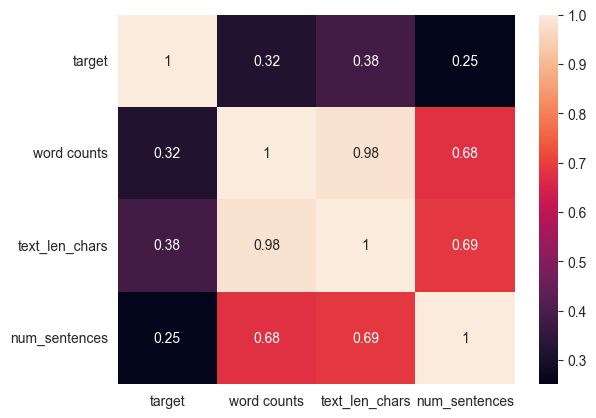

In [104]:
sns.heatmap(data.corr( method='pearson', min_periods=1, numeric_only=True) , annot=True )

<Figure size 800x800 with 0 Axes>

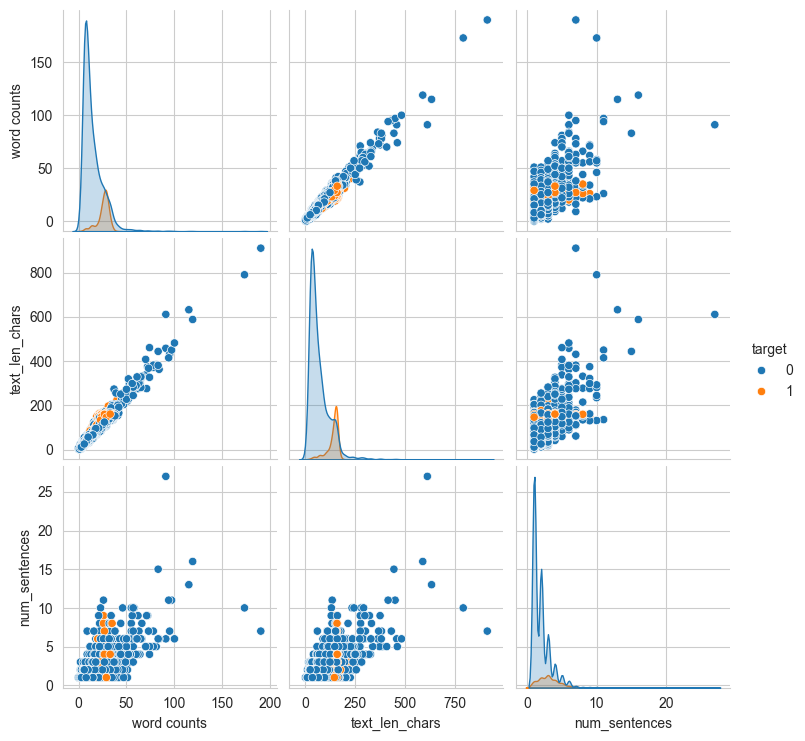

In [105]:
plt.figure(figsize=(8,8))
sns.pairplot(data,hue='target')

* There is high collinearity between word counts and number of chars in the mails, which is pretty obvious.
* Numbers of Chars has correlation with the target also might be useful feature in model building.

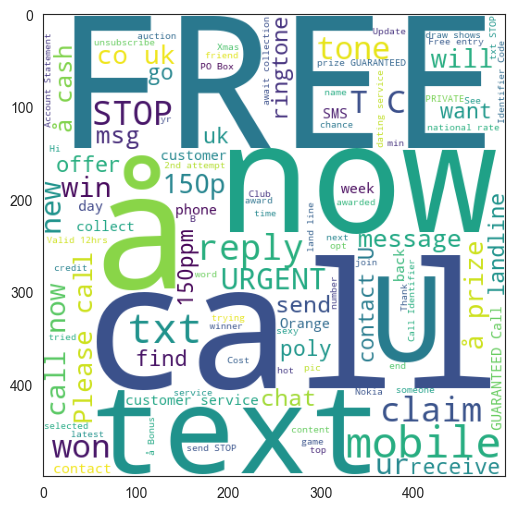

In [106]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
sns.set_style("white")
spam_wc = wc.generate(data[data['target'] == 1]['text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

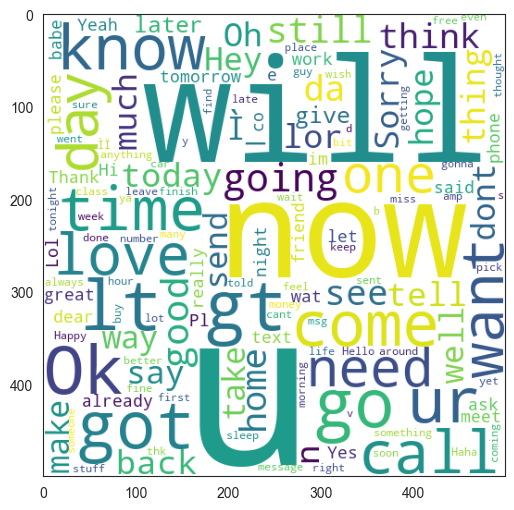

In [107]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
sns.set_style("white")
spam_wc = wc.generate(data[data['target'] == 0]['text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [108]:
spam_corpus = []
for msg in data[data['target'] == 1]['text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

* Spam mail has frequnt words like text,free,call,offer etc.
* while not spam has words like come,love,go,call,need etc.

In [109]:
from collections import Counter
# sns.barplot(pd.DataFrame(Counter(sCounter(spam_corpus)

In [110]:
import nltk

# Append the paths manually
nltk.data.path.append('C:\\Users\\HHH\\AppData\\Roaming\\nltk_data')
nltk.data.path.append('C:\\Users\\HHH\\nltk_data')

# Now try to use the tokenizer and stopwords again

### Text Preprocessing.

In [116]:
ps = PorterStemmer()
import spacy
nlp = spacy.load('en_core_web_sm')

html_entities_dict = {
    
    '&#34;': '"', '&#38;': '&', '&#39;': "'", '&#60;': '<', '&#62;': '>',
    '&#160;': ' ', '&#169;': '©', '&#174;': '®', '&#8482;': '™', '&#9829;': '♥',
    '&#9825;': '♦', '&#9830;': '♣', '&#9827;': '♠', '&#9679;': '•', '&#8230;': '…',
    '&#8364;': '€', '&#163;': '£', '&#165;': '¥', '&#162;': '¢', '&#8592;': '←',
    '&#8594;': '→', '&#8593;': '↑', '&#8595;': '↓', '&lt;': '<', '&gt;': '>',
    '&amp;': '&', '&quot;': '"', '&apos;': "'", '&cent;': '¢', '&pound;': '£',
    '&yen;': '¥', '&euro;': '€', '&copy;': '©', '&reg;': '®', '&trade;': '™',
    '&times;': '×', '&divide;': '÷', '&alpha;': 'α', '&beta;': 'β', '&gamma;': 'γ',
    '&delta;': 'δ', '&epsilon;': 'ε', '&pi;': 'π', '&sigma;': 'σ', '&theta;': 'θ',
    '&omega;': 'ω', '&mu;': 'μ', '&lambda;': 'λ', '&nbsp;': ' ', '&ensp;': ' ',
    '&emsp;': ' ', '&thinsp;': ' ', '&zwj;': '‍', '&zwnj;': '‌',
    
}

emoticons = {':)': 'happy', ':(': 'sad', ':d': 'laughing', ':p': 'playful', ';)': 'Wink',
             ':o': 'surprised', ':|': 'neutral', ':/': 'skeptical', ':*': 'kiss', ':]': 'Joyful',
             ':[': 'Disappointed', ':S': 'Confused', ':$': 'Embarrassed', ':X': 'Silent',
             ':#': 'muted', 'xd': 'laughing', ';d': 'wink', 'b)': 'cool', 'b-)': 'cool',
             '8)': 'cool', '8-)': 'cool', ':-d': 'happy', ':-p': 'playful', ':-/': 'skeptical',
             'O:)': 'Angel', 'O:-)': 'Angel', '>:(': 'Angry', 'D:': 'Shocked', ':-@': 'Angry',
             ':-s': 'confused', ':-|': 'neutral', ':-\\': 'skeptical', ':-#': 'muted', ':@': 'angry',
             ':\\': 'skeptical', ':-)': 'smile', ':-(': 'sad', ';-)': 'wink', ':-o': 'surprised',
             '<3': 'love', ':-*': 'kiss', ':-]': 'joyful', ':-[': 'disappointed', ':-$': 'embarrassed',
             ':-x': 'silent'
            }


def lowercase_text(text):
    text = text.lower()
    return text

def stem_words(tokens):
    return [ps.stem(token) for token in tokens]

# Define a function to replace HTML entities in text data
def replace_html_entities(text):
    # Iterate over each HTML entity and its corresponding character in the dictionary
    for entity, char in html_entities_dict.items():
        # Replace the HTML entity with its corresponding character in the text
        text = text.replace(entity, char)
    return text


def url_remove(text):      
    url_pattern = r'(https:\/\/www\.|http:\/\/www\.|https:\/\/|http:\/\/)?[a-zA-Z]{2,}(\.[a-zA-Z]{2,})(\.[a-zA-Z]{2,})?\/[a-zA-Z0-9]{2,}|((https:\/\/www\.|http:\/\/www\.|https:\/\/|http:\/\/)?[a-zA-Z]{2,}(\.[a-zA-Z]{2,})(\.[a-zA-Z]{2,})?)|(https:\/\/www\.|http:\/\/www\.|https:\/\/|http:\/\/)?[a-zA-Z0-9]{2,}\.[a-zA-Z0-9]{2,}\.[a-zA-Z0-9]{2,}(\.[a-zA-Z0-9]{2,})?'
    email_pattern = r'[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}'
    text = regex.sub( email_pattern, '' , text)
    text = regex.sub( url_pattern, '' , text)
    return text


def replace_emoticons(text):
    # Iterate over each emoticon and its corresponding emotion in the dictionary
    for emoticon, emotion in emoticons.items():
        # Replace the emoticon with its corresponding emotion in the text
        text = text.replace(emoticon, emotion)
    return text


def recipe_review(series):
    series =  series.apply(lowercase_text)
    series = series.apply(replace_html_entities)
    series= series.apply(url_remove)
    series = series.apply(replace_emoticons)
    return series


def transform_text(text):
    # Process the text with spaCy
    doc = nlp(text)
    
    # Filter out tokens that are not alphanumeric
    tokens = [token.text for token in doc if token.is_alpha]
    
    # Remove stopwords
    tokens = [token.lower() for token in tokens if not token.lower() in nlp.Defaults.stop_words]
    
    # Perform stemming on the tokens
    tokens = stem_words(tokens)
    
    return " ".join(tokens)


# Example usage
data['text_clean'] = data['text'].apply( lambda x : lowercase_text(x))
data['text_clean'] = data['text_clean'].apply( lambda x : replace_html_entities(x))
data['text_clean'] = data['text_clean'].apply( lambda x : replace_emoticons(x))
data['text_clean'] = data['text_clean'].apply( lambda x : transform_text(x))

data

,text,target,word counts,text_len_chars,num_sentences,text_clean
0,"Go until jurong point, crazy.. Available only ...",0,20,111,3,jurong point crazi avail bugi n great world la...
1,Ok lar... Joking wif u oni...,0,6,29,2,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,33,155,2,free entri wkli comp win fa cup final tkt text...
3,U dun say so early hor... U c already then say...,0,11,49,2,u dun earli hor u c
4,"Nah I don't think he goes to usf, he lives aro...",0,14,61,1,nah think goe usf live
...,...,...,...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1,33,161,4,time tri contact u won pound prize claim easi ...
5568,Will Ì_ b going to esplanade fr home?,0,8,37,1,ì b go esplanad fr home
5569,"Pity, * was in mood for that. So...any other s...",0,10,57,2,piti mood suggest
5570,The guy did some bitching but I acted like i'd...,0,27,125,3,guy bitch act like interest buy week gave free


In [117]:
data

,text,target,word counts,text_len_chars,num_sentences,text_clean
0,"Go until jurong point, crazy.. Available only ...",0,20,111,3,jurong point crazi avail bugi n great world la...
1,Ok lar... Joking wif u oni...,0,6,29,2,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,33,155,2,free entri wkli comp win fa cup final tkt text...
3,U dun say so early hor... U c already then say...,0,11,49,2,u dun earli hor u c
4,"Nah I don't think he goes to usf, he lives aro...",0,14,61,1,nah think goe usf live
...,...,...,...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1,33,161,4,time tri contact u won pound prize claim easi ...
5568,Will Ì_ b going to esplanade fr home?,0,8,37,1,ì b go esplanad fr home
5569,"Pity, * was in mood for that. So...any other s...",0,10,57,2,piti mood suggest
5570,The guy did some bitching but I acted like i'd...,0,27,125,3,guy bitch act like interest buy week gave free


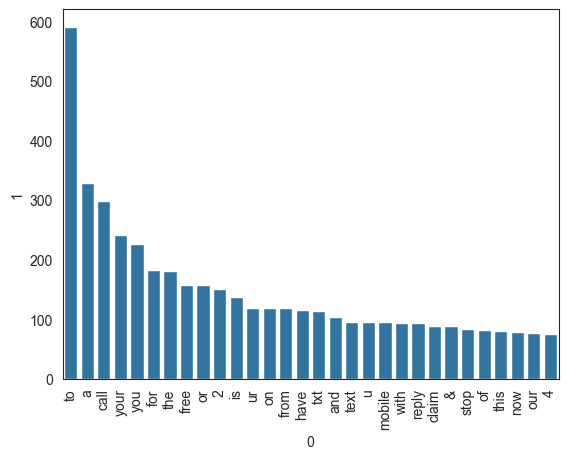

In [112]:
from collections import Counter
spam_corpus = []
for msg in data[data['target'] == 1]['text_clean'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

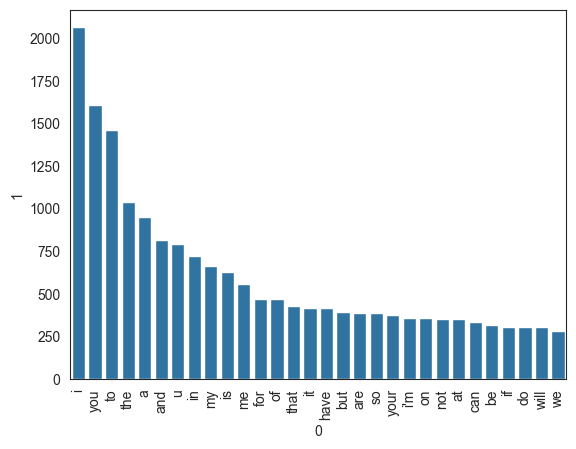

In [113]:
from collections import Counter
spam_corpus = []
for msg in data[data['target'] == 0]['text_clean'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()





### Model Building.

In [114]:
data

,text,target,word counts,text_len_chars,num_sentences,text_clean
0,"Go until jurong point, crazy.. Available only ...",0,20,111,3,"go until jurong point, crazy.. available only ..."
1,Ok lar... Joking wif u oni...,0,6,29,2,ok lar... joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,33,155,2,free entry in 2 a wkly comp to win fa cup fina...
3,U dun say so early hor... U c already then say...,0,11,49,2,u dun say so early hor... u c already then say...
4,"Nah I don't think he goes to usf, he lives aro...",0,14,61,1,"nah i don't think he goes to usf, he lives aro..."
...,...,...,...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1,33,161,4,this is the 2nd time we have tried 2 contact u...
5568,Will Ì_ b going to esplanade fr home?,0,8,37,1,will ì_ b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other s...",0,10,57,2,"pity, * was in mood for that. so...any other s..."
5570,The guy did some bitching but I acted like i'd...,0,27,125,3,the guy did some bitching but i acted like i'd...


In [ ]:
tfidf = TfidfVectorizer(max_features=3000)
a = data[['text_len_chars' , 'word counts' ]].values
b = tfidf.fit_transform(data['text_clean']).toarray()
X= np.hstack((a,b))

In [ ]:
X.shape

In [ ]:
y = data['target'].values

In [ ]:
X.shape , y.shape

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=68)

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=4)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)


clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'MNB': mnb, 
    'BNB':bnb,
    'GNB':gnb,
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}


def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    return accuracy,precision,recall,clf

model_name = []
model=[]
recall_scores = []
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy,current_precision,current_recall,clf = train_classifier(clf, X_train,y_train,X_test,y_test)
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("recall - ", current_recall)
    print("Precision - ",current_precision)
    model_name.append(name)
    recall_scores.append(current_recall)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    model.append(clf)


df_setting = pd.DataFrame({
  'model_name' : model_name , 'accuracy': accuracy_scores, 'precision_scores':precision_scores, 'recall_scores':recall_scores
})
df_sorted = df_setting.sort_values(by=['accuracy', 'precision_scores'], ascending=[False, False])
df_sorted

* BNB,RF,ETC has high accuracy
* MNB,BNB,RF,ETC high precision a`lso

### some other techniques again

In [ ]:
tfidf = TfidfVectorizer(max_features=5000 , ngram_range=(1, 2))
a = data[['text_len_chars' , 'word counts' ]].values
b = tfidf.fit_transform(data['text_clean']).toarray()
X= np.hstack((a,b))
y = data['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=68)
print("Before SMOTE:", Counter(y_train))

# Apply SMOTE
smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)

# Check class distribution after resampling
print("After SMOTE:", Counter(y_train))

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=4)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'MNB': mnb, 
    'BNB':bnb,
    'GNB':gnb,
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}


def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    return accuracy,precision,recall,clf

model_name = []
model=[]
recall_scores = []
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy,current_precision,current_recall,clf = train_classifier(clf, X_train,y_train,X_test,y_test)
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("recall - ", current_recall)
    print("Precision - ",current_precision)
    model_name.append(name)
    recall_scores.append(current_recall)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    model.append(clf)


df_setting2 = pd.DataFrame({
  'model_name' : model_name , 'accuracy': accuracy_scores, 'precision_scores':precision_scores, 'recall_scores':recall_scores
})


df_sorted = df_setting2.sort_values(by=['accuracy', 'precision_scores'], ascending=[False, False])


df_sorted

In [ ]:
tfidf = TfidfVectorizer(max_features=3000 , ngram_range=(1, 1) , lowercase=True , stop_words='english')
a = data[['text_len_chars' , 'word counts' ]].values
b = tfidf.fit_transform(data['text_clean']).toarray()
X= np.hstack((a,b))
y = data['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=68)
print("Before SMOTE:", Counter(y_train))

# Apply SMOTE
# smt = SMOTE()
# X_train, y_train = smt.fit_resample(X_train, y_train)

# Check class distribution after resampling
print("After SMOTE:", Counter(y_train))

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=4)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)


clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'MNB': mnb, 
    'BNB':bnb,
    'GNB':gnb,
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}


def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    return accuracy,precision,recall,clf


model_name = []
model=[]
recall_scores = []
accuracy_scores = []
precision_scores = []


for name,clf in clfs.items():
    current_accuracy,current_precision,current_recall,clf = train_classifier(clf, X_train,y_train,X_test,y_test)
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("recall - ", current_recall)
    print("Precision - ",current_precision)
    model_name.append(name)
    recall_scores.append(current_recall)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    model.append(clf)


df_setting3 = pd.DataFrame({
  'model_name' : model_name , 'accuracy': accuracy_scores, 'precision_scores':precision_scores, 'recall_scores':recall_scores
})


df_sorted = df_setting3.sort_values(by=['accuracy', 'precision_scores'], ascending=[False, False])


df_sorted

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_setting1, df_setting2, and df_setting3 are already created
# Combine the DataFrames into one
df_combined = pd.concat([df_setting, df_setting2, df_setting3])

# Sort by accuracy to get the top 5 models
df_top5 = df_combined.sort_values(by='accuracy', ascending=False)

# Melt the dataframe to get it into a long format for easier plotting with seaborn
df_melted = df_top5.melt(id_vars='model_name', value_vars=['accuracy', 'precision_scores', 'recall_scores'], 
                         var_name='Metric', value_name='Score')

# Create a grouped bar plot to compare the models
plt.figure(figsize=(10, 6))
sns.barplot(x='model_name', y='Score', hue='Metric', data=df_melted)
plt.title('Comparison of Top 5 Models across Accuracy, Precision, and Recall')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
tfidf = TfidfVectorizer(max_features=2700, ngram_range=(1, 1) , lowercase=True , stop_words='english')
a = data[['text_len_chars' , 'word counts' ]].values
b = tfidf.fit_transform(data['text_clean']).toarray()
X= np.hstack((a,b))
y = data['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=68)
print("Before SMOTE:", Counter(y_train))
# Apply SMOTE
# smt = SMOTE()
# X_train, y_train = smt.fit_resample(X_train, y_train)
# Check class distribution after resampling
print("After SMOTE:", Counter(y_train))

### Focus on these models only.

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=68)

In [ ]:
bnb = BernoulliNB()
bnb.fit(X_train,y_train)
y_hat = bnb.predict(X_test)

In [ ]:
print(classification_report(y_test,y_hat))

In [ ]:
sns.set_style("white") 
ConfusionMatrixDisplay.from_predictions(y_test,y_hat) 
plt.show() 

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_hat = mnb.predict(X_test)
print(classification_report(y_test,y_hat))

ConfusionMatrixDisplay.from_predictions(y_test,y_hat) 
plt.show() 

In [ ]:
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
rfc.fit(X_train,y_train)
y_hat = rfc.predict(X_test)
print(classification_report(y_test,y_hat))
ConfusionMatrixDisplay.from_predictions(y_test,y_hat) 
plt.show()

In [ ]:
etc = ExtraTreesClassifier(n_estimators=100, random_state=2)
etc.fit(X_train,y_train)
y_hat = etc.predict(X_test)
print(classification_report(y_test,y_hat))
ConfusionMatrixDisplay.from_predictions(y_test,y_hat)
plt.show()

## ETC is best till now

In [ ]:
X.shape

In [ ]:
etc = ExtraTreesClassifier(n_estimators=100, random_state=2)
etc.fit(X_train,y_train)
y_hat_prob = etc.predict_proba(X_test)
y_prob = etc.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
# Plot PR Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)


plt.figure()
plt.plot(recall, precision, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()


# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)


plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()

In [ ]:
y_prob = etc.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
y_hat_dash = np.where( y_prob < 0.5, 0, 1 )# Print classificat`ion report
print(classification_report(y_test, y_hat_dash))
ConfusionMatrixDisplay.from_predictions(y_test, y_hat_dash)

In [ ]:
etc_1 = ExtraTreesClassifier(n_estimators=100, random_state=2)
rf_1 = RandomForestClassifier(n_estimators=50, random_state=2)
bnb_1 = MultinomialNB()


vclf = VotingClassifier(estimators=[
        ('etc', etc_1), ('rf', rf_1), ('bnv', bnb_1)], voting='hard')

vclf.fit(X_train,y_train)
y_hat = vclf.predict(X_test)
print(classification_report(y_test,y_hat))
ConfusionMatrixDisplay.from_predictions(y_test,y_hat)
plt.show()

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define the base classifiers
etc = ExtraTreesClassifier(n_estimators=100, random_state=2)
rf = RandomForestClassifier(n_estimators=50, random_state=2)
bnb = MultinomialNB()

# Define the StackingClassifier
# Use LogisticRegression as the final estimator (meta-classifier) by default
stack_clf = StackingClassifier(
    estimators=[('etc', etc), ('rf', rf), ('bnb', bnb)],
    final_estimator=LogisticRegression(),
    cv=5  # Cross-validation to train the final estimator
)

# Fit the stacking classifier
stack_clf.fit(X_train, y_train)

# Predict on the test set
y_hat = stack_clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_hat))

# Plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_hat)
plt.show()

In [ ]:
def pre_process(text):
    
    text = lowercase_text(text)
    text = replace_html_entities(text)
    text = replace_emoticons(text)
    return text
    
pre_process('Hii how are you Rohit Senb')

In [ ]:

def simple_tokenize(text):
    return re.findall(r'\b\w+\b', text)


In [ ]:
def predict(text):
    # Preprocess the input text
    text = pre_process(text)
    
    # Convert the text into a TF-IDF vector
    vector = tfidf.transform([text]).toarray()
    
    # Calculate additional features
    length = len(text)  # Length of the text (number of characters)
    word_len = len(simple_tokenize(text))  # Number of words (tokenized text)
    
    # Create a feature array with the additional properties
    prop = np.array([length, word_len]).reshape(1, -1)
    
    # Combine TF-IDF vector with additional features
    vector = np.hstack((vector, prop))
    # print(vector.shape)
    return vector

In [ ]:
etc = ExtraTreesClassifier(n_estimators=100, random_state=2)
etc.fit(X_train,y_train)

In [ ]:
emails = [
    # Top 10 spam emails
    '	Congrats! 1 year special cinema pass for 2 is yours. call 09061209465 now! C Suprman V, Matrix3, StarWars3, etc all 4 FREE! bx420-ip4-5we. 150pm. Dont miss out!',
    'You are guaranteed the latest Nokia Phone, a 40GB iPod MP3 player or a å£500 prize! Txt word: COLLECT to No: 83355! IBHltd LdnW15H 150p/Mtmsgrcvd18+',
    'Boltblue tones for 150p Reply POLY# or MONO# eg POLY3 1. Cha Cha Slide 2. Yeah 3. Slow Jamz 6. Toxic 8. Come With Me or STOP 4 more tones txt MORE',
    "Congratulations! You've won a FREE vacation! Click here to claim your prize now!",
    "Hurry up! Get a FREE iPhone by completing this short survey. Limited time offer!",
    "Exclusive offer: Work from home and earn $5000 weekly! Apply now!",
    "You've been selected for a FREE gift card! Redeem it now!",
    "Your bank account has been compromised. Act fast to secure your funds!",
    "Urgent: You have 1 unread message from the lottery commission. Claim your $1,000,000 prize!",
    "Get a FREE trial of our weight loss supplements! Only pay for shipping!",
    "Congratulations! You've been pre-approved for a $10,000 loan with no credit check!",
    "Limited offer: Buy one, get one FREE on all electronics! Shop now!",
    "Act fast! FREE entry into our sweepstakes for a chance to win a new car!",

    # Next 10 non-spam emails
   ' I am in tirupur da, once you started from office call me.			',
'spam	from www.Applausestore.com MonthlySubscription@50p/msg max6/month T&CsC web age16 2stop txt stop			',
"ham	A famous quote : when you develop the ability to listen to 'anything' unconditionally without losing your temper or self confidence, it means you are ......... 'MARRIED"
    "Meeting Reminder: Our project review is tomorrow at 2 PM. Please be on time.",
    "Invoice #5678 is now paid in full. Thank you for your prompt payment!",
    "Happy Birthday, Sarah! Wishing you a great day filled with joy and success.",
    "Your flight to Chicago has been confirmed. Please find your itinerary attached.",
    "We’ve received your job application. We will review it and get back to you shortly.",
    "Please find attached the updated project report for your review.",
    "We’re hosting a farewell party for Mark this Friday at 4 PM. Hope to see you there!",
    "Thank you for attending our webinar. We’ve attached the presentation slides for your reference.",
    "I hope this email finds you well. I wanted to follow up on the status of our contract.",
    "Your package has been shipped and is expected to arrive by Tuesday. Thank you for your order!"

]



# You can now access or print this list of emails:
for i, email in enumerate(emails):
    x1 = predict(email)
    if i < 10 :
        print("____________________________________________________________________SPAMS____________________________________________________________")
    if i >= 10 :
        print("____________________________________________________________________NOT SPAMS____________________________________________________________")


    print(i, email)
    print("************BNB*******************")
    prob_bnb = bnb.predict_proba(x1)
    if prob_bnb[0][1] > 0.3:
        print("SPAM")
    else :
        print("NOT SPAM")
    print(prob_bnb)
    
    print("************etc*******************")
    prob_etc = etc.predict_proba(x1)
    if prob_etc[0][1] > 0.3:
        print("SPAM")
    else :
        print("NOT SPAM")
    print(prob_etc)
    print("************rfc*******************")
    prob_rfc = rfc.predict_proba(x1)
    if prob_rfc[0][1] > 0.3:
        print("SPAM")
    else :
        print("NOT SPAM")
    print(prob_rfc)
    print("************vclf*******************")
    prob_vclf = vclf.predict_proba(x1)
    if prob_vclf[0][1] > 0.1:
        print("SPAM")
    else :
        print("NOT SPAM")
    print(prob_vclf)
   


In [ ]:
print("************BNB*******************")
prob = bnb.predict_proba(x1)
if prob[0][1] > 0.1:
    print("SPAM")
else :
    print("NOT SPAM")
print(prob)

print("************etc*******************")
prob = etc.predict_proba(x1)
if prob[0][1] > 0.1:
    print("SPAM")
else :
    print("NOT SPAM")
print(prob)
print("************mnb*******************")
prob = mnb.predict_proba(x1)
if prob[0][1] > 0.01:
    print("SPAM")
else :
    print("NOT SPAM")
print(prob)

In [ ]:
prob

In [ ]:
print(etc.predict_proba(x1))

In [ ]:
print(etc.predict(x1))

In [ ]:
data.sample(5)

In [ ]:
data

In [ ]:
a = BernoulliNB()
b = RandomForestClassifier(n_estimators=50, random_state=2)
c = ExtraTreesClassifier(n_estimators=100, random_state=2)

vclf = VotingClassifier(estimators=[
        ('etc', c), ('rf', b), ('bnv', a)], voting='soft' , weights=[0.3,0.3,0.4] , n_jobs = -1 )
vclf.fit(X_train,y_train)
y_hat = vclf.predict(X_test)
print(classification_report(y_test,y_hat))
ConfusionMatrixDisplay.from_predictions(y_test,y_hat)
plt.show()

In [ ]:
import pickle

In [ ]:
pickle.dump(tfidf , open('tfidf.pkl' , 'wb'))
pickle.dump(vclf,open('modelvclf.pkl','wb'))

### Deep Learning

In [118]:
data

,text,target,word counts,text_len_chars,num_sentences,text_clean
0,"Go until jurong point, crazy.. Available only ...",0,20,111,3,jurong point crazi avail bugi n great world la...
1,Ok lar... Joking wif u oni...,0,6,29,2,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,33,155,2,free entri wkli comp win fa cup final tkt text...
3,U dun say so early hor... U c already then say...,0,11,49,2,u dun earli hor u c
4,"Nah I don't think he goes to usf, he lives aro...",0,14,61,1,nah think goe usf live
...,...,...,...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1,33,161,4,time tri contact u won pound prize claim easi ...
5568,Will Ì_ b going to esplanade fr home?,0,8,37,1,ì b go esplanad fr home
5569,"Pity, * was in mood for that. So...any other s...",0,10,57,2,piti mood suggest
5570,The guy did some bitching but I acted like i'd...,0,27,125,3,guy bitch act like interest buy week gave free


In [119]:
file = data[['text_clean','target']]

In [120]:
X_train, X_test, y_train, y_test = train_test_split(file['text_clean'], file['target'], test_size=0.2, random_state=42)

In [126]:
from gensim.models import Word2Vec
# Train Word2Vec model
# w2v_model = Word2Vec(sentences=X_train, vector_size=200, window=5, min_count=2, workers=4 )
# Get the vocabulary
# vocab = w2v_model.wv.key_to_index

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject